This notebook demonstrates how to plot a power curve using the outputs of the `power_analysis.R` script.

In [1]:
library(ggplot2)
library(rhdf5)
library(patchwork)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load data
In this example, we are using the output of `power_analysis.R`, which is stored in a file called `power_analysis_plot_data.csv` in the output folder. This data frame stores the percentage of evaluated cases where the interaction term was correctly classified at different simulated MOI ($\lambda$) and interaction effect sizes. For an interaction term to be correctly classified, GLiMMIRS-int would have to call the interaction term ($\beta_{AB}$) significant, in the case of positive enhancer pairs, or insignificant, in the case of negative enhancer pairs. This information is stored in the `pct.detected` column of the data frame. 

In this example, we load the output from a run which evaluated the **positive enhancer pairs**. Evaluating the positive pairs, which have a ground truth interaction effect ($\beta_{AB} \neq 0$), allows us to calculate true positive rate (TPR), or power. Therefore, that is the how the `pct.detected` column can be interpreted here.
If `power_analysis.R` were run with the `--neg` flag, it would evaluate the **negative enhancer pairs**. Then `pct.detected` represents the true negative rate, or percentage of cases where the model correctly called the interaction term insignificant. 

In [6]:
power.df <- read.table("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_28-11-2023_filt10/positive_power_analysis.tsv", header=1)
head(power.df)

,effect.size,TPR,lambda,set,FPR
,<dbl>,<dbl>,<int>,<chr>,<lgl>
1,0.5,0.0790378,15,positive,NA
2,1.0,0.2852234,15,positive,NA
3,2.0,0.7113402,15,positive,NA
4,3.0,0.9243986,15,positive,NA
5,4.0,0.9656357,15,positive,NA
6,5.0,0.9725086,15,positive,NA


# Plot

## TPR

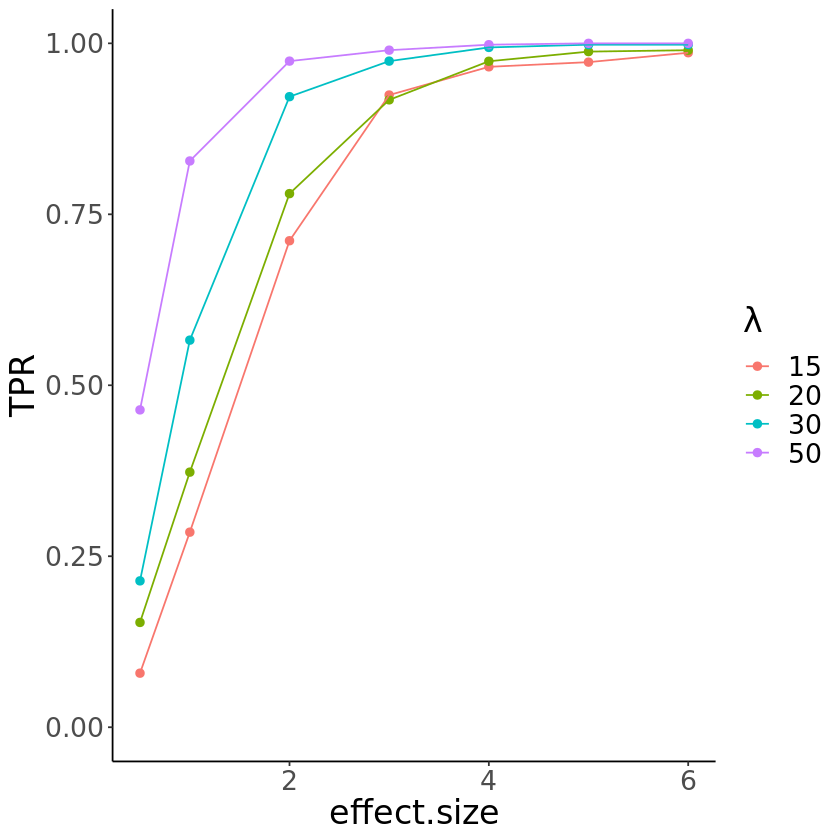

In [8]:
ggplot(power.df, aes(x = effect.size, y = TPR, color = as.factor(lambda))) +
                        geom_point(size = 2) + geom_line() +  theme_classic() + 
                    ylim(0,1) +
                    guides(color=guide_legend(title=expression(lambda))) + 
                    theme(text = element_text(size = 20)) 

This plot shows the power that GLiMMIRS-int has for detecting true interaction effects between enhancer pairs at different simulated MOI and effect sizes. 